In [1]:

#Check TF version
import tensorflow as tf
print(tf.__version__)


2.3.0


In [2]:
# Is GPU enabled
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Fix it")

Default GPU Device:/device:GPU:0


In [3]:

from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, \
  Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import earthpy as et 

In [4]:
## Code needed to set a new working directory

#my_path = os.path.join(et.io.HOME, 'recommender_system')
#os.mkdir(my_path)

## Set Working Directory
os.chdir(os.path.join("/home/ckamerin/Documents/GitHub", 'recommender_system'))

In [5]:
# Check if it worked
os.getcwd()

&#39;/home/ckamerin/Documents/GitHub/recommender_system&#39;

In [6]:
# Data Import
df = pd.read_csv("/home/ckamerin/Desktop/headphone_df_cleaned.csv")

In [7]:
df = df.sample(frac=1).reset_index(drop=True)
df = df.drop(columns='Unnamed: 0')

In [8]:
df.columns

Index([&#39;headphone_name&#39;, &#39;game_use&#39;, &#39;travel_use&#39;, &#39;exercise_use&#39;,
       &#39;office_use&#39;, &#39;phone_call_use&#39;, &#39;studio_use&#39;, &#39;wireless&#39;,
       &#39;noise_cancelling&#39;, &#39;mic_presence&#39;, &#39;frequency_response_consistency&#39;,
       &#39;bass_accuracy&#39;, &#39;mid_accuracy&#39;, &#39;treble_accuracy&#39;, &#39;peaks_dips&#39;,
       &#39;imaging&#39;, &#39;passive_soundstage&#39;, &#39;weighted_harmonic_distortion&#39;,
       &#39;noise_isolation&#39;, &#39;microphone_rating&#39;, &#39;mic_recording_quality&#39;,
       &#39;bluetooth&#39;, &#39;closed_back&#39;, &#39;open_back&#39;, &#39;in_ear&#39;, &#39;on_ear&#39;, &#39;over_ear&#39;,
       &#39;head_set&#39;],
      dtype=&#39;object&#39;)

In [9]:
X=df[['travel_use', 'exercise_use', 'office_use',
       'phone_call_use', 'studio_use', 'game_use']]
y=df[[ 'wireless', 'noise_cancelling',
       'mic_presence', 'frequency_response_consistency', 'bass_accuracy',
       'mid_accuracy', 'treble_accuracy', 'peaks_dips', 'imaging',
       'passive_soundstage', 'weighted_harmonic_distortion', 'noise_isolation',
       'microphone_rating', 'mic_recording_quality', 'bluetooth',
       'closed_back', 'open_back', 'in_ear', 'on_ear', 'over_ear', 'head_set']]

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
x1_train, x1_test, y1_train, y1_test = y_train, y_test, X_train, X_test

In [12]:
# Put models in a dictionary
models = {"KNN": KNeighborsRegressor(),
          'KNN Multi' : MultiOutputRegressor(KNeighborsRegressor()),
          "Random Forest": RandomForestRegressor(),
          "Random Forest Multi": MultiOutputRegressor(RandomForestRegressor()),
          "Linear Regression": LinearRegression(),
          "Linear Regression Multi": MultiOutputRegressor(LinearRegression()),
          'Decision Tree Regression': DecisionTreeRegressor(),
          'Decision Tree Multi': MultiOutputRegressor(DecisionTreeRegressor()),
          'Ridge Regressor Chain': RegressorChain(Ridge()),
          'Ridge Regresor Multioutput': MultiOutputRegressor(Ridge())
          }
# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores



In [13]:
#Test all models on one dataset
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{&#39;KNN&#39;: 0.599778178639396,
 &#39;KNN Multi&#39;: 0.599778178639396,
 &#39;Random Forest&#39;: 0.5886879251928663,
 &#39;Random Forest Multi&#39;: 0.6285097404574641,
 &#39;Linear Regression&#39;: 0.5444887788478071,
 &#39;Linear Regression Multi&#39;: 0.5444887788478071,
 &#39;Decision Tree Regression&#39;: 0.19152007634124824,
 &#39;Decision Tree Multi&#39;: 0.26194138595007344,
 &#39;Ridge Regressor Chain&#39;: 0.5288152584304666,
 &#39;Ridge Regresor Multioutput&#39;: 0.5288152584304666}

In [14]:
model_scores = fit_and_score(models=models,
                             X_train=x1_train,
                             X_test=x1_test,
                             y_train=y1_train,
                             y_test=y1_test)
model_scores

{&#39;KNN&#39;: 0.8497970055606429,
 &#39;KNN Multi&#39;: 0.8497970055606429,
 &#39;Random Forest&#39;: 0.8516601228507065,
 &#39;Random Forest Multi&#39;: 0.8754651302596562,
 &#39;Linear Regression&#39;: 0.9156168267307402,
 &#39;Linear Regression Multi&#39;: 0.9156168267307402,
 &#39;Decision Tree Regression&#39;: 0.755113198364849,
 &#39;Decision Tree Multi&#39;: 0.739954070698437,
 &#39;Ridge Regressor Chain&#39;: 0.9114208755853902,
 &#39;Ridge Regresor Multioutput&#39;: 0.9114208755853904}

In [15]:
np.random.seed(42)
ANN = tf.keras.models.Sequential([
  tf.keras.layers.Dense(108, input_dim = 6, activation='relu'),
  #tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(512, activation='relu'),
  #tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(21, activation= 'linear')
])

In [16]:
opt = tf.keras.optimizers.Adam(.00001)
mae = tf.keras.losses.MeanAbsoluteError()
ANN.compile(optimizer=opt,metrics=['accuracy'],loss='mse')


In [17]:
hp_model=ANN.fit(x=X_train,y=y_train, validation_data = (X_test, y_test), epochs=350 ,batch_size = 16)
#hp_model=ANN.fit(x=x1_train,y=y1_train, validation_data = (x1_test, y1_test), epochs=100 ,batch_size = 16)

[==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.3043 - val_loss: 0.0434 - val_accuracy: 0.3966
Epoch 212/350
15/15 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.3087 - val_loss: 0.0437 - val_accuracy: 0.4138
Epoch 213/350
15/15 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.3217 - val_loss: 0.0434 - val_accuracy: 0.4138
Epoch 214/350
15/15 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.3174 - val_loss: 0.0433 - val_accuracy: 0.4138
Epoch 215/350
15/15 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.3217 - val_loss: 0.0433 - val_accuracy: 0.4138
Epoch 216/350
15/15 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.3217 - val_loss: 0.0433 - val_accuracy: 0.4138
Epoch 217/350
15/15 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.3130 - val_loss: 0.0432 - val_accuracy: 0.4138
Epoch 218/350
15/15

&lt;matplotlib.legend.Legend at 0x7fbfac4cb0a0&gt;

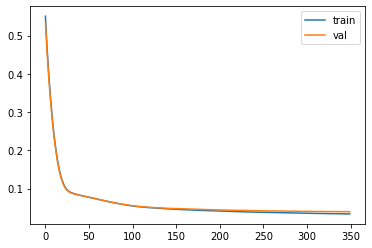

In [18]:
plt.plot(hp_model.history['loss'],label='loss')
plt.plot(hp_model.history['val_loss'],label='val_loss')
plt.legend(['train','val'])

&lt;matplotlib.legend.Legend at 0x7fbfaffe3ac0&gt;

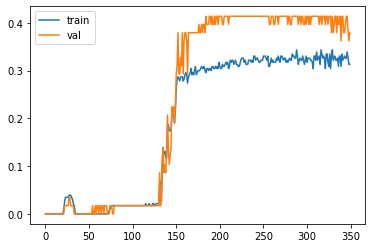

In [19]:
plt.plot(hp_model.history['accuracy'],label='accuracy')
plt.plot(hp_model.history['val_accuracy'],label='val_accuracy')
plt.legend(['train','val'])

In [20]:
userlist = np.array([[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [21]:
userinputs = pd.DataFrame(data=userlist,columns = df.columns )

In [22]:
userinputs

,headphone_name,game_use,travel_use,exercise_use,office_use,phone_call_use,studio_use,wireless,noise_cancelling,mic_presence,...,noise_isolation,microphone_rating,mic_recording_quality,bluetooth,closed_back,open_back,in_ear,on_ear,over_ear,head_set
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_pred=userinputs[['travel_use', 'exercise_use', 'office_use',
       'phone_call_use', 'studio_use',  'game_use']]

In [24]:
y_pred=ANN.predict(X_pred)

In [25]:
annpreddf = pd.DataFrame(data=y_pred, columns =y.columns)


In [26]:
annpreddf

,wireless,noise_cancelling,mic_presence,frequency_response_consistency,bass_accuracy,mid_accuracy,treble_accuracy,peaks_dips,imaging,passive_soundstage,...,noise_isolation,microphone_rating,mic_recording_quality,bluetooth,closed_back,open_back,in_ear,on_ear,over_ear,head_set
0,0.096270,-0.078872,0.176291,0.168226,0.098831,0.124639,0.156752,0.106362,0.151175,0.005064,...,0.094648,0.159382,0.127994,0.071718,0.203379,0.000266,0.242804,0.002267,-0.097962,0.005064
1,0.030106,-0.042024,0.039074,0.135130,0.112860,0.147658,0.150999,0.130245,0.191010,0.072013,...,0.049336,0.015607,0.019078,0.057627,0.122655,0.074602,0.125649,-0.003358,0.055094,0.009502
2,0.200429,-0.071318,0.136129,0.368717,0.162191,0.205057,0.157895,0.213790,0.262588,-0.043498,...,0.177078,0.031364,-0.006719,0.116920,0.216913,0.085184,0.481830,0.018573,-0.195522,-0.012810
3,0.121782,-0.226634,0.129154,0.339713,0.101716,0.162978,0.168453,0.189239,0.250814,-0.013980,...,0.074625,0.032415,-0.020423,0.086544,0.140498,0.170947,0.500878,0.007302,-0.231616,-0.014367
4,0.064136,0.018379,0.105476,0.165565,0.084929,0.128608,0.087785,0.066319,0.109932,0.021853,...,0.120078,-0.031366,0.014469,0.070910,0.150686,0.033411,0.189389,-0.017655,-0.085696,0.020397
5,0.021707,-0.171379,-0.005968,0.332237,0.085741,0.205185,0.232295,0.199096,0.260928,-0.054635,...,0.066445,-0.053981,-0.065736,0.071597,0.124259,0.170229,0.422704,-0.023979,-0.098289,0.010685


In [27]:
np.random.seed(42)

KNN = KNeighborsRegressor(n_neighbors=6,weights='distance',algorithm='brute')

In [28]:
KNN.fit(X_train,y_train)

KNeighborsRegressor(algorithm=&#39;brute&#39;, n_neighbors=6, weights=&#39;distance&#39;)

In [29]:
KNN.score(X_test,y_test)

0.6166551223074017

In [30]:
knny_pred = KNN.predict(X_pred)

In [31]:
knnpreddf = pd.DataFrame(data=knny_pred, columns =y.columns)

In [32]:
knnpreddf

,wireless,noise_cancelling,mic_presence,frequency_response_consistency,bass_accuracy,mid_accuracy,treble_accuracy,peaks_dips,imaging,passive_soundstage,...,noise_isolation,microphone_rating,mic_recording_quality,bluetooth,closed_back,open_back,in_ear,on_ear,over_ear,head_set
0,1.0,0.0,1.0,0.427420,0.139898,0.475511,0.527918,0.298694,0.488387,0.306869,...,0.313004,0.605833,0.644754,0.826144,0.840576,0.159424,0.493958,0.0,0.0,0.346618
1,1.0,0.0,1.0,0.423909,0.139596,0.475735,0.525522,0.297897,0.484787,0.308819,...,0.309702,0.604500,0.644192,0.826205,0.842678,0.157322,0.490954,0.0,0.0,0.351725
2,1.0,0.0,1.0,0.428327,0.140584,0.477280,0.527551,0.300490,0.490503,0.306230,...,0.315054,0.605038,0.643782,0.825338,0.841950,0.158050,0.496908,0.0,0.0,0.345042
3,1.0,0.0,1.0,0.426560,0.139751,0.476072,0.527801,0.298775,0.488947,0.306856,...,0.312431,0.605178,0.644160,0.825976,0.841433,0.158567,0.495062,0.0,0.0,0.346372
4,1.0,0.0,1.0,0.427755,0.140539,0.476969,0.527331,0.300184,0.489745,0.306770,...,0.314601,0.605071,0.643849,0.825477,0.841284,0.158716,0.495761,0.0,0.0,0.345523
5,1.0,0.0,1.0,0.521641,0.152819,0.554869,0.549754,0.402375,0.587310,0.259278,...,0.327028,0.608699,0.651203,0.794842,1.000000,0.000000,0.655223,0.0,0.0,0.344777


In [33]:
np.random.seed(42)

RF = RandomForestRegressor()

In [34]:
RF.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
RF.score(X_test,y_test)

0.5886879251928663

In [36]:
rf_pred = RF.predict(X_pred)

In [37]:
rfpreddf = pd.DataFrame(data=rf_pred, columns =y.columns)

In [38]:
rfpreddf

,wireless,noise_cancelling,mic_presence,frequency_response_consistency,bass_accuracy,mid_accuracy,treble_accuracy,peaks_dips,imaging,passive_soundstage,...,noise_isolation,microphone_rating,mic_recording_quality,bluetooth,closed_back,open_back,in_ear,on_ear,over_ear,head_set
0,0.12,0.07,0.88,0.220000,0.581839,0.600408,0.491235,0.395111,0.748421,0.568667,...,0.391383,0.803146,0.788222,0.110000,0.77,0.23,0.11,0.0,0.77,0.07
1,0.04,0.00,0.04,0.478511,0.645977,0.852653,0.567901,0.613333,0.874526,0.651778,...,0.280638,0.018427,0.023111,0.030909,0.31,0.24,0.22,0.0,0.74,0.04
2,0.04,0.00,0.04,0.491277,0.671494,0.836735,0.521975,0.584667,0.875263,0.477000,...,0.429043,0.019101,0.021222,0.030682,0.62,0.07,0.40,0.0,0.57,0.03
3,0.76,0.00,0.76,0.507660,0.211724,0.611020,0.540123,0.300444,0.365474,0.338444,...,0.128830,0.481573,0.495000,0.679432,0.86,0.08,0.29,0.0,0.12,0.58
4,0.04,0.00,0.04,0.485106,0.658506,0.845306,0.549877,0.597778,0.892000,0.523000,...,0.393830,0.021798,0.019222,0.030114,0.52,0.10,0.35,0.0,0.64,0.01
5,0.03,0.00,0.03,0.492128,0.686552,0.867755,0.667654,0.640000,0.881263,0.719667,...,0.236170,0.014944,0.016667,0.024432,0.20,0.30,0.13,0.0,0.84,0.03


In [39]:
rfdf = pd.DataFrame(columns = ['game_use', 'travel_use', 'exercise_use',
       'office_use', 'phone_call_use', 'studio_use', 'wireless',
       'noise_cancelling', 'mic_presence', 'frequency_response_consistency',
       'bass_accuracy', 'mid_accuracy', 'treble_accuracy', 'peaks_dips',
       'imaging', 'passive_soundstage', 'weighted_harmonic_distortion',
       'noise_isolation', 'microphone_rating', 'mic_recording_quality',
       'bluetooth', 'closed_back', 'open_back', 'in_ear', 'on_ear', 'over_ear',
       'head_set'])

In [40]:
rfdf[['game_use', 'travel_use', 'exercise_use',
       'office_use', 'phone_call_use', 'studio_use']] = X_pred[['game_use', 'travel_use', 'exercise_use',
       'office_use', 'phone_call_use', 'studio_use']]
rfdf[['wireless',
       'noise_cancelling', 'mic_presence', 'frequency_response_consistency',
       'bass_accuracy', 'mid_accuracy', 'treble_accuracy', 'peaks_dips',
       'imaging', 'passive_soundstage', 'weighted_harmonic_distortion',
       'noise_isolation', 'microphone_rating', 'mic_recording_quality',
       'bluetooth', 'closed_back', 'open_back', 'in_ear', 'on_ear', 'over_ear',
       'head_set']] = rfpreddf[['wireless',
       'noise_cancelling', 'mic_presence', 'frequency_response_consistency',
       'bass_accuracy', 'mid_accuracy', 'treble_accuracy', 'peaks_dips',
       'imaging', 'passive_soundstage', 'weighted_harmonic_distortion',
       'noise_isolation', 'microphone_rating', 'mic_recording_quality',
       'bluetooth', 'closed_back', 'open_back', 'in_ear', 'on_ear', 'over_ear',
       'head_set']]

In [41]:
rfdf

,game_use,travel_use,exercise_use,office_use,phone_call_use,studio_use,wireless,noise_cancelling,mic_presence,frequency_response_consistency,...,noise_isolation,microphone_rating,mic_recording_quality,bluetooth,closed_back,open_back,in_ear,on_ear,over_ear,head_set
0,0,0,0,0,1,0,0.12,0.07,0.88,0.220000,...,0.391383,0.803146,0.788222,0.110000,0.77,0.23,0.11,0.0,0.77,0.07
1,1,0,0,0,0,0,0.04,0.00,0.04,0.478511,...,0.280638,0.018427,0.023111,0.030909,0.31,0.24,0.22,0.0,0.74,0.04
2,0,1,0,0,0,0,0.04,0.00,0.04,0.491277,...,0.429043,0.019101,0.021222,0.030682,0.62,0.07,0.40,0.0,0.57,0.03
3,0,0,1,0,0,0,0.76,0.00,0.76,0.507660,...,0.128830,0.481573,0.495000,0.679432,0.86,0.08,0.29,0.0,0.12,0.58
4,0,0,0,1,0,0,0.04,0.00,0.04,0.485106,...,0.393830,0.021798,0.019222,0.030114,0.52,0.10,0.35,0.0,0.64,0.01
5,0,0,0,0,0,1,0.03,0.00,0.03,0.492128,...,0.236170,0.014944,0.016667,0.024432,0.20,0.30,0.13,0.0,0.84,0.03


In [42]:
randomdf = rfdf

In [43]:
np.random.seed(42)

LR = LinearRegression()

In [44]:
LR.fit(x1_train,y1_train)

LinearRegression()

In [45]:
LR.score(x1_test,y1_test)

0.9156168267307402

In [46]:
randomdf[['game_use', 'travel_use', 'exercise_use',
       'office_use', 'phone_call_use', 'studio_use']]=LR.predict(rfpreddf)

In [47]:
knnhpx=df[['travel_use', 'exercise_use', 'office_use',
       'phone_call_use', 'studio_use', 'game_use', 'wireless', 'noise_cancelling',
       'mic_presence', 'frequency_response_consistency', 'bass_accuracy',
       'mid_accuracy', 'treble_accuracy', 'peaks_dips', 'imaging',
       'passive_soundstage', 'weighted_harmonic_distortion', 'noise_isolation',
       'microphone_rating', 'mic_recording_quality', 'bluetooth',
       'closed_back', 'open_back', 'in_ear', 'on_ear', 'over_ear', 'head_set']]
knnhpy=df['headphone_name']

In [48]:
len(knnhpy)

288

In [49]:
knnhp = KNeighborsRegressor(n_neighbors=288,weights='distance')

In [50]:
knnhp.fit(knnhpx,knnhpy)

KNeighborsRegressor(n_neighbors=288, weights=&#39;distance&#39;)

In [51]:
targets = knnhp.predict(randomdf).round()

In [52]:
targets

array([143., 139., 141., 146., 140., 138.])

In [53]:
#Attempting to pull target info from target identified 
df.loc[df['headphone_name'] == targets[0]]

,headphone_name,game_use,travel_use,exercise_use,office_use,phone_call_use,studio_use,wireless,noise_cancelling,mic_presence,...,noise_isolation,microphone_rating,mic_recording_quality,bluetooth,closed_back,open_back,in_ear,on_ear,over_ear,head_set
96,143,5.7,0.888889,0.945946,0.8,0.815385,0.575,1,0,1,...,0.734043,0.741573,0.777778,0.897727,1,0,1,0,0,0
